<a href="https://colab.research.google.com/github/AdindaRahajengSilviaPranesti/MarchineLearning_2141720158_AdindaRSP_02/blob/main/Jobsheet9_Perceptron%26ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**PRAKTIKUM 1**
####**Klasifikasi Iris dengan Perceptron**

Pada pratikum ini, Anda diminta untuk melakukan klasifikasi bunga iris dengan menggunakan model Perceptron. Anda dapat menggunakan dataset iris pada praktikum sebelumnya.
Untuk nembah pemahaman Anda terkait dengan model Perceptron, pada pratkikum ini Anda akan membuat model Perceptron tanpa menggunakan library.

###**Step 1 - Import Library**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


###**Step 2 - Load Data and Visualization**

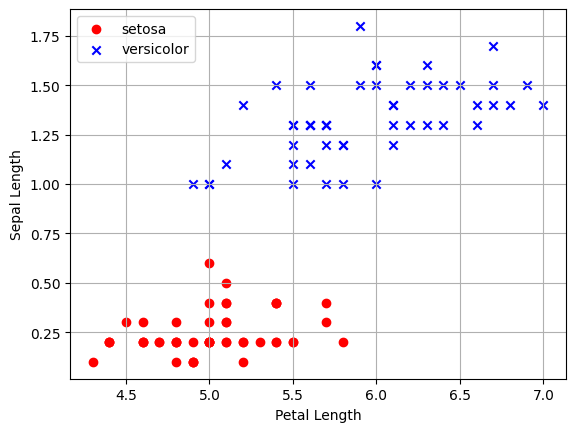

In [3]:
df = pd.read_csv('iris.csv', header=None, skiprows=1)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

###**Step 3 - Making Perceptron Class**

In [4]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

###**Sep 4 - Choose Data and Label Encoding**

In [6]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

###**Step 5 - Fitting Model**

In [7]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

###**Step 6 - Visualisasi Nilai Error Per Epoch**

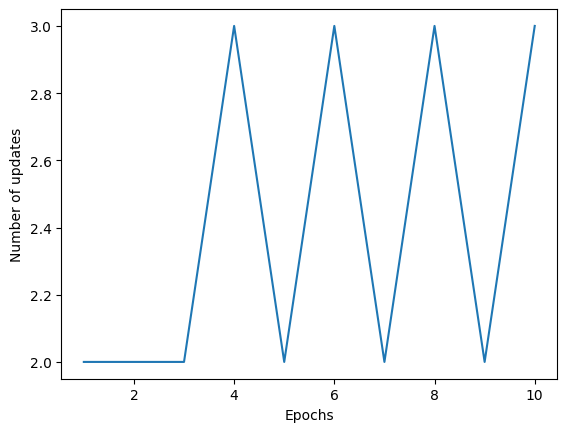

In [9]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

###**Step 7 - Visualiasasi Decision Boundary**

In [11]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

##**PRAKTIKUM 2**
####**Klasifikasi Berita dengan Perceptron**

Dalam kasus ini, Anda akan melakukan klasifiaksi berita berdasarkan 3 kategori, yaitu Sport Hockey, Sport Baseball, dan Otomotif. Proses klasifikasi akan menggunakan model Perceptron.

###**Step 1 - Import Library**

In [12]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

###**Step 2 - Pilih Label dan Split Data**

In [14]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

###**Step 3 - Ekstrak Fitur dan Buat Model Perceptron**

In [15]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



**Penjelasan**


######Dataset yang digunakan pada kode program diatas adalah 20newsgroup yang terdiri dari sekitar 20.000 dokumen. Scikit-learn bahkan menyediakan fungsi yang memberikan kemudahan untuk mengunduh dan membaca kumpulan dataset dengan menggunakan sklearn.datasets. pada kode program diatas Perceptron mampu melakukan klasifikasi multikelas; strategi yang digunakan adalah one-versus-all untuk melakukan pelatihan untuk setiap kelas dalam data training. Dokumen teks memerlukan ekstraksi fitur salah satunya adalah bobot tf-idf pada kodeprogram diatas digunakan tfidf-vectorizer.

##**PRAKTIKUM 3**
####**XOR Logic Using Multi-Layer Perceptron (MLP)**

Pada kasus sederhana ini, Anda akan menggunakan MLP untuk mendapatkan nilai biner yang dioperasikan dengan logika XOR. Perlu diingat bahwa nilai XOR berbeda dengan OR, XOR hanya akan bernilai benar jika salah satu nilai yang benar, bukan keduanya atau tidak sama sekali.


In this simple case, you will use a Multi-Layer Perceptron (MLP) to obtain binary values operated with XOR logic. It's important to remember that XOR is different from OR; XOR will only be true if one of the values is true, not both or none at all.

###**Langkah 1 - Import Library**

In [20]:
from sklearn.neural_network import MLPClassifier

###**Langkah 2 - Buat Data**

In [17]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

###**Langkah 3 - Fit Model**

In [18]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

###**Langkah 4 - Prediksi**

In [19]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


##**LAB WORK 4**
####**Churn Customer Prediction Using ANN**

Pada praktikum kali ini, Anda diminta untuk membuat model ANN untuk mengklasifikasi potensi seorang customer akan meninggalkan perusahaan Anda atau tidak. Istirlah populer dari fenomena ini disebut sebagai 'churn'. Tingkat churn yang tinggi (chrun rate) akan berdampak tidak baik bagi perusahaan.


In this lab session, you are required to create an Artificial Neural Network (ANN) model to classify whether a customer is likely to leave your company or not. The popular term for this phenomenon is referred to as 'churn.' A high churn rate can have unfavorable consequences for the company.

##**Pra Pengolahan Data**
###**Step1 - Import Library**

In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf

###**Step 2 - Load Data**

In [23]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

Cek data (X)

In [24]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


###**Step 3 - Encoding Data Kategorikal**

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [28]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


###**Step 4 - Encoding Kolom "Geography" dengan One Hot Encoder**

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [32]:
print (X)

[[1.0 0.0 1.0 ... 1 1 101348.88]
 [1.0 0.0 0.0 ... 0 1 112542.58]
 [1.0 0.0 1.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 1.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 1.0 ... 1 0 38190.78]]


###**Step 5 - Split Data**

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

###**Step 6 - Scaling Fitur**


In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##**Create an ANN Model**

###**Step 1 - Initiate ANN Object**

In [35]:
ann = tf.keras.models.Sequential()

###**Step 2 - Create Input Layer and First Hidden Layer**

In [36]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

###**Step 3 - Create Second Hidden Layer**

In [37]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

###**Step 4 - Create Output Layerr**

In [38]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

###**Step 5 - Compile The ANN Model**

In [39]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [40]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

##**Training The Mode**
###**Step 1 - Fitting**

In [41]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 0.6440 - accuracy: 0.6625
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4943 - accuracy: 0.7977
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4518 - accuracy: 0.8030
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4325 - accuracy: 0.8111
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4222 - accuracy: 0.8160
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4143 - accuracy: 0.8196
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4067 - accuracy: 0.8225
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.8261
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3881 - accuracy: 0.8329
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3779 - accura

###**Create Prediction Data**

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 232ms/step
[[False]]


###**Prediction Using Testing Data**

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 3ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


###**Check The Model Accuraction and Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1504   91]
 [ 185  220]]


0.862

#**Tugas**
Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
Anda diperbolehkan melakukan eksplorasi terhadap,
- Metode pra pengolahan
- Pemilihan fitur
- Arsitektur ANN
- Fungsi Aktiviasi
- ANN diimplementasikan dengan menggunakan tensorflow.
- DIKERJAKAN SECARA BERKELOMPOK
- JELASKAN HASIL YANG ANDA DAPATKAN,
- AKURASI
- CONFUSION MATRIX
- KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

#**Task**
Perform classification on MNIST data using the ANN model
You are allowed to explore,
- Pre-processing method
- Feature selection
- ANN architecture
- Activation Function
- ANN is implemented using tensorflow.
- WORKED AS A GROUP
- EXPLAIN THE RESULTS YOU GET,
- ACCURACY
- CONFUSION MATRIX
- MODEL CONFIGURATION --> STARTING FROM PRE-PROCESSING TO ANN ARCHITECTURE

TENSORFLOW
TERAKHIR BISA PKE SIGMOID AJ
bebas ukuranya dan jumlahnya
jelaskan arsitektur ANNnya




##**Step 1**

###**Langkah 4 - Membuat Output Layer**

###**Langkah 4 - Membuat Output Layer**

###**Langkah 4 - Membuat Output Layer**